 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

### 1. Import libraries and dependencies

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

### 2. Create a Path to the File Using Pathlib

In [2]:
# Use the Pathlib libary to set the path to the CSV
whale_returns_csv = Path("Resources/whale_returns.csv")
algo_returns_csv = Path("Resources/algo_returns.csv")
sptsx60_history_csv = Path("Resources/sp_tsx_history.csv")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns_csv,index_col='Date', infer_datetime_format=True, parse_dates = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Determine percentage of nulls
whale_returns_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [6]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [7]:
# Check count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
# Check determine percentage of nulls
whale_returns_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [10]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [12]:
# Check count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P TSX 60 Closing Prices
sptsx60_history_df = pd.read_csv(sptsx60_history_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)
sptsx60_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [14]:
# Check Data Types
sptsx60_history_df.dtypes                                                                                                                                                               

Close    object
dtype: object

In [15]:
# Fix Data Types
sptsx60_history_df["Close"] = sptsx60_history_df["Close"].str.replace('$','',regex=False)
sptsx60_history_df.head()

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [16]:
# Fix Data Types
sptsx60_history_df["Close"] = sptsx60_history_df["Close"].str.replace(',','',regex=False)
sptsx60_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [17]:
# sp500_history.to_numeric
sptsx60_history_df['Close'] = sptsx60_history_df['Close'].astype(float)
sptsx60_history_df.dtypes

Close    float64
dtype: object

In [18]:
# Calculate Daily Returns
sptsx60_history_df = sptsx60_history_df.pct_change()
sptsx60_history_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [19]:
# Drop nulls
sptsx60_history_df.dropna(inplace=True)
sptsx60_history_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [20]:
# Rename `Close` Column to be specific to this portfolio.
sptsx60_history_df.rename(columns={"Close": "S&P TSX"},inplace = True)
sptsx60_history_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_whale_algo_sptsx60_df = pd.concat([whale_returns_df, algo_returns_df, sptsx60_history_df], axis="columns", join="inner")
combined_whale_algo_sptsx60_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [22]:
combined_whale_algo_sptsx60_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


In [23]:
combined_whale_algo_sptsx60_df.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.000141,-0.000241,-0.000099,0.000377,0.000713,0.000208,0.000087
std,0.007828,0.006982,0.010883,0.012826,0.007589,0.008326,0.007034
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.031241
25%,-0.003662,-0.004038,-0.004784,-0.005725,-0.003139,-0.003892,-0.003668
50%,0.000529,0.000000,0.000295,0.000635,0.000143,0.000629,0.000587
75%,0.004330,0.003621,0.005324,0.007516,0.004038,0.005256,0.004237
max,0.029881,0.027032,0.080705,0.061341,0.050735,0.030509,0.029389


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

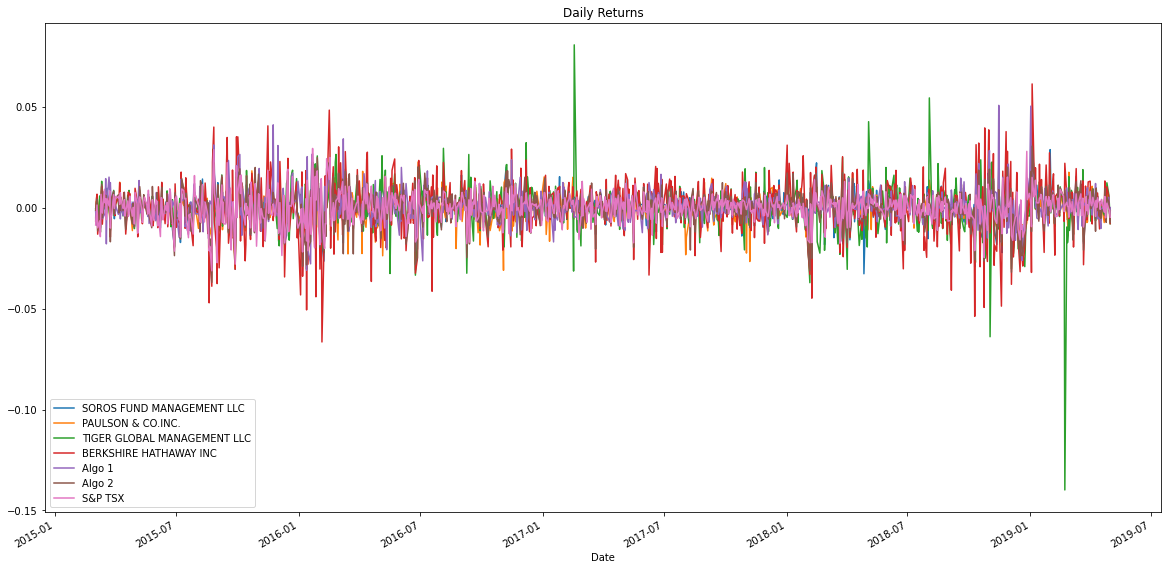

In [24]:
# Plot daily returns of all portfolios
combined_whale_algo_sptsx60_df.plot(figsize=(20,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

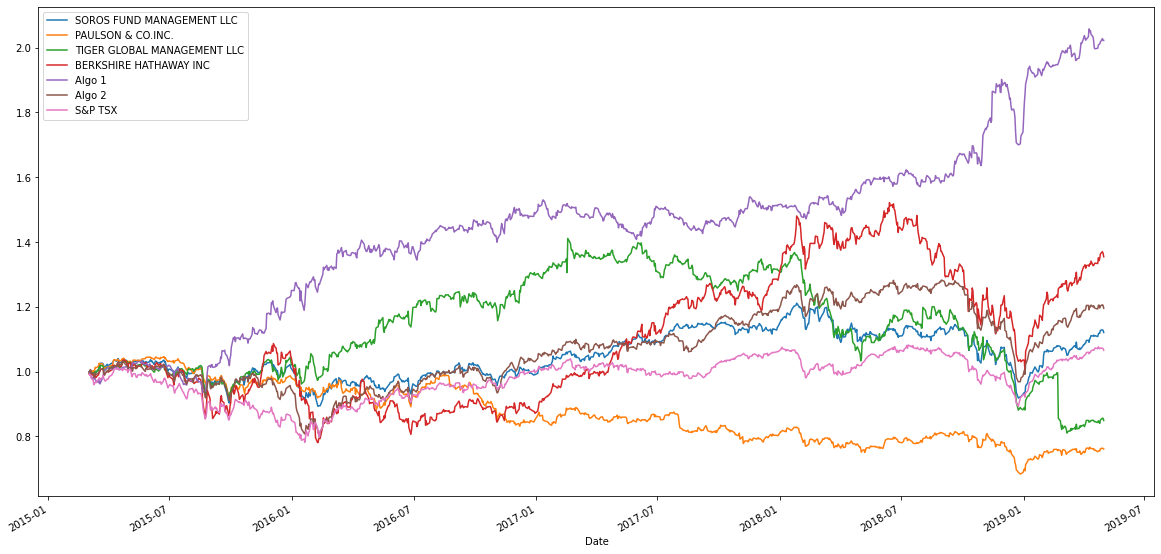

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 +combined_whale_algo_sptsx60_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


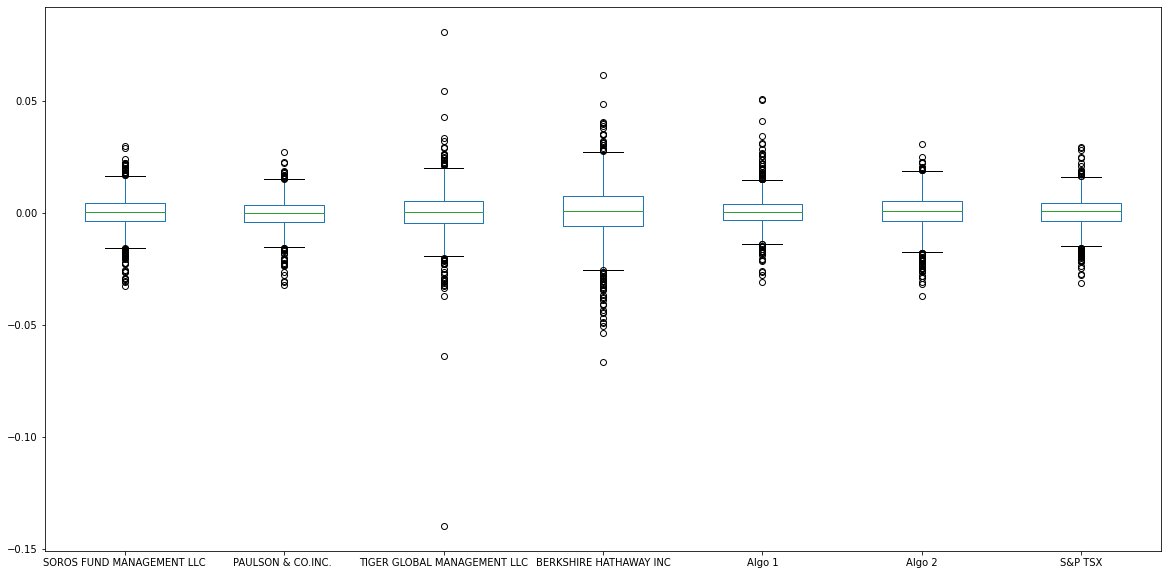

In [26]:
# Box plot to visually show risk
combined_whale_algo_sptsx60_df_boxplot = combined_whale_algo_sptsx60_df.boxplot(figsize = (20,10), grid = False)

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
combined_whale_algo_sptsx60_df_std = combined_whale_algo_sptsx60_df.std()
combined_whale_algo_sptsx60_df_std.sort_values(inplace=True)
combined_whale_algo_sptsx60_df_std

PAULSON & CO.INC.              0.006982
S&P TSX                        0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [28]:
# Calculate  the daily standard deviation of S&P TSX 60
combined_whale_algo_sptsx60_df['S&P TSX']

Date
2015-03-03   -0.008530
2015-03-04   -0.003371
2015-03-05    0.001344
2015-03-06   -0.009972
2015-03-09   -0.006555
                ...   
2019-04-25   -0.000628
2019-04-26    0.002254
2019-04-29   -0.000788
2019-04-30   -0.001183
2019-05-01   -0.004703
Name: S&P TSX, Length: 1029, dtype: float64

In [29]:
# Determine which portfolios are riskier than the S&P TSX 60
combined_whale_algo_sptsx60_df_std > combined_whale_algo_sptsx60_df_std['S&P TSX']

PAULSON & CO.INC.              False
S&P TSX                        False
Algo 1                          True
SOROS FUND MANAGEMENT LLC       True
Algo 2                          True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [30]:
combined_whale_algo_sptsx60_df_std > combined_whale_algo_sptsx60_df_std['Algo 2']

PAULSON & CO.INC.              False
S&P TSX                        False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [31]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_whale_algo_sptsx60_df.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [32]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
group_rolling = combined_whale_algo_sptsx60_df.rolling(window=21).std()
group_rolling

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


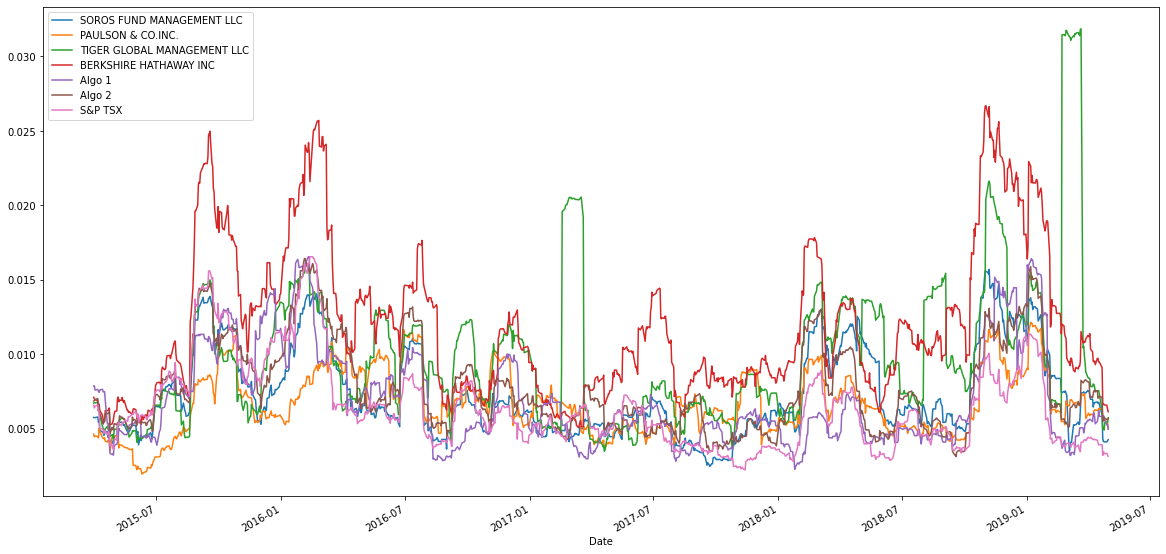

In [33]:
# Plot the rolling standard deviation
group_rolling = combined_whale_algo_sptsx60_df.rolling(window=21).std().plot(figsize = (20,10))

### Calculate and plot the correlation

In [34]:
# Calculate the correlation
corr_returns = combined_whale_algo_sptsx60_df.corr()
corr_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

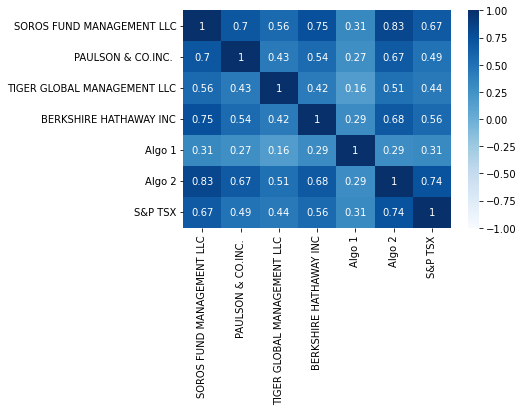

In [35]:
# Display de correlation matrix
sns.heatmap(corr_returns, vmin = -1, vmax = 1, annot=True, cmap="Blues")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [36]:
# Calculate covariance of a single portfolio
berkshire_covariance = whale_returns_df['BERKSHIRE HATHAWAY INC'].cov
berkshire_covariance

<bound method Series.cov of Date
2015-03-03   -0.006569
2015-03-04    0.004213
2015-03-05    0.006726
2015-03-06   -0.013098
2015-03-09   -0.001652
                ...   
2019-04-25    0.004848
2019-04-26    0.010434
2019-04-29    0.005223
2019-04-30   -0.003702
2019-05-01   -0.007833
Name: BERKSHIRE HATHAWAY INC, Length: 1059, dtype: float64>

In [37]:
# Calculate variance of S&P TSX
spTSX_variance = combined_whale_algo_sptsx60_df['S&P TSX'].rolling(window=60).var()
spTSX_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [38]:
# Computing beta
berkshire_spTSX = combined_whale_algo_sptsx60_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_whale_algo_sptsx60_df['S&P TSX'])
berkshire_spTSX

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000019
2019-04-26    0.000019
2019-04-29    0.000018
2019-04-30    0.000018
2019-05-01    0.000018
Length: 1029, dtype: float64

In [39]:
berkshire_beta = berkshire_spTSX / spTSX_variance
berkshire_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.243097
2019-04-26    1.245349
2019-04-29    1.207654
2019-04-30    1.229613
2019-05-01    1.221931
Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

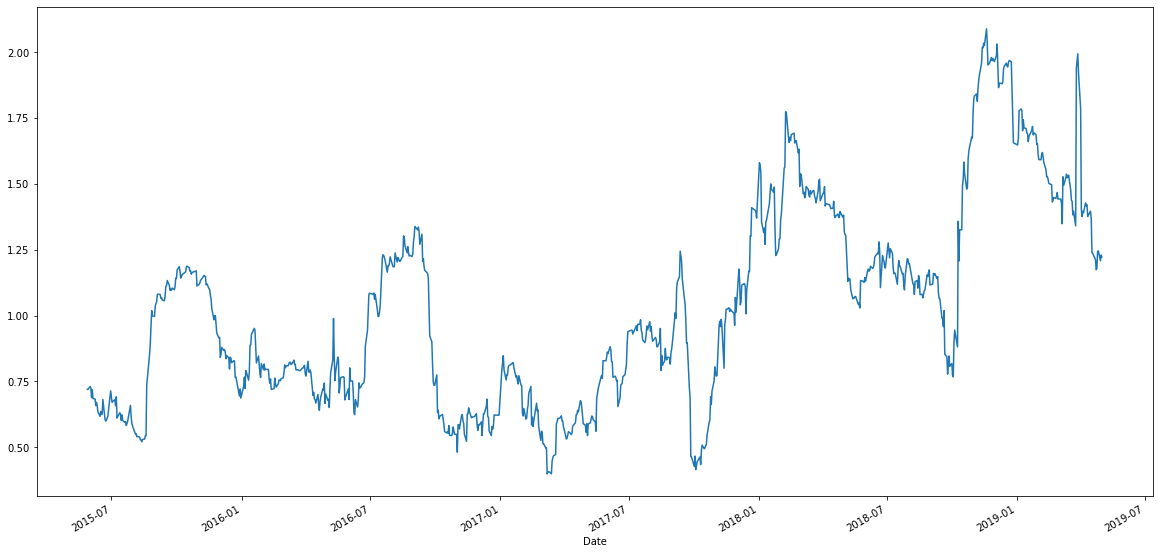

In [40]:
# Plot beta trend
berkshire_beta.plot(figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

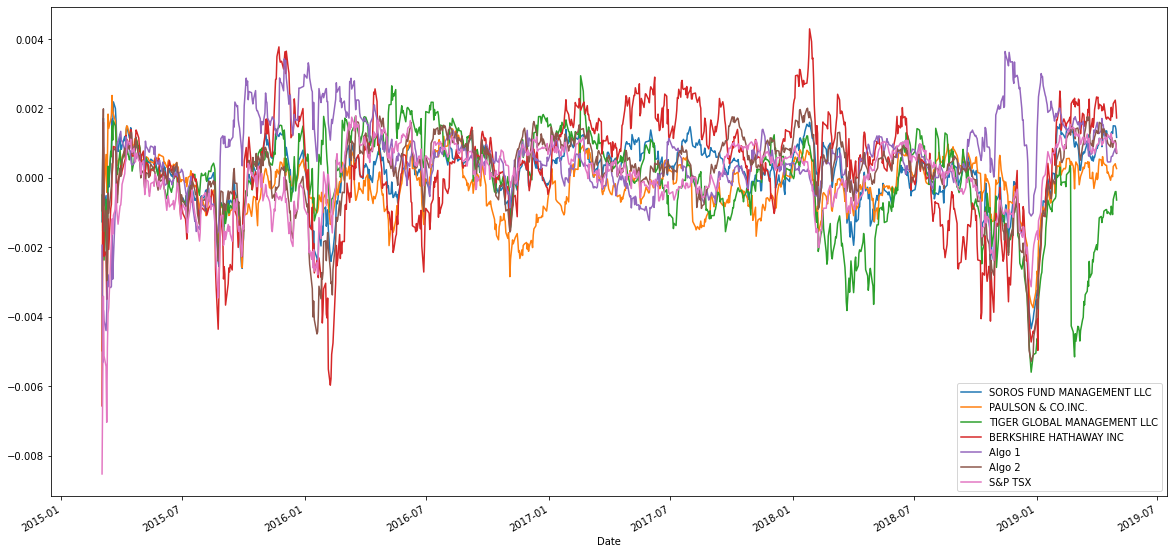

In [41]:
# Use `ewm` to calculate the rolling window
ewm = combined_whale_algo_sptsx60_df.ewm(halflife = 21).mean().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
annual_sharpe_ratios = (combined_whale_algo_sptsx60_df.mean() * 252) / (combined_whale_algo_sptsx60_df.std() * np.sqrt(252))
annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:>

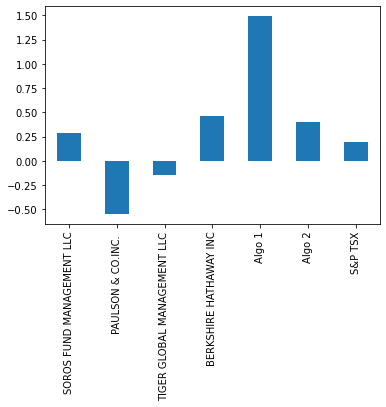

In [43]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!


short answer yes Algorithmic 1 & 2 (Algo 1, Algo 2)out performed both 'S&P TSX 60' and 'whales porfolios', when looking at portfolio to portfolio as a whole. Mainly Algo 1 was able to generate higher returns on a risk managed basis.

**Combined Return:** Algo 1 & 2 are unexeceptional compared to Whales & S&P TSX 60 portfolio. Overall figures in 'describ()' Berkshire stock from whales portfolio dtands out to be the better return, however the remaining whales stock evens the out performing Berkshire stock.

**Daily returns Plot:** Tiger global stock from whale returns displays extreme highs and lows indicating high volatility low cofidence in stock. S&P TSX appears consistent. Berkshire appears to be the better perfoming stock with beter returns but also same lows.

**Cumulative Returns PLot:** Algo 1 outperforms all portfolios. consistent growth, not much volatility action.

**Box Plot:** Can be seen as a summary of previous data Algo 1 has more cluster in the 95%tile, Tiger stock has the highest volatility showing the highest and lowest point indicator. Berkshire altho has the most consistent data to the mean, this stock also has more data in the 5%tile

**Standard Deviation:** all unremarkable to each other. All stock are relatively close to mean

**Standard Deviation Plot:** Berkshire & Tiger stocks standout showing higher deviation from the mean. Algo 1 & 2 are relatively consistent to the mean

**Correlation:** Algo 2 is the better combination to other stocks, oddely enough being less compatible to Algo 1. Whales portfolio consists of stock that are compatiable to each other.

**Sharpe Ratio:** Algo 1 was able to generate higher returns on a risk managed basis as indicated by the higher sharpe ratio value




# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Reading data from 1st stock
aveo_historical_csv = Path("Resources/aveo_historical.csv")
aveo_historical_df = pd.read_csv(aveo_historical_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)
aveo_historical_df

,Close
Date,
2015-03-03 16:00:00,11.50
2015-03-04 16:00:00,15.40
2015-03-05 16:00:00,14.20
2015-03-06 16:00:00,15.00
2015-03-09 16:00:00,15.60
...,...
2019-04-25 16:00:00,9.00
2019-04-26 16:00:00,9.00
2019-04-29 16:00:00,9.52


In [45]:
# Reading data from 2nd stock
cldx_historical_csv = Path("Resources/cldx_historical.csv")
cldx_historical_df = pd.read_csv(cldx_historical_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)
cldx_historical_df.head()

,Close
Date,
2015-03-03 16:00:00,395.55
2015-03-04 16:00:00,439.50
2015-03-05 16:00:00,446.70
2015-03-06 16:00:00,440.85
2015-03-09 16:00:00,428.55


In [46]:
# Reading data from 3rd stock
ptc_historical_csv = Path("Resources/ptc_historical.csv")
ptc_historical_df = pd.read_csv(ptc_historical_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)
ptc_historical_df.head()

,Close
Date,
2015-03-03 16:00:00,33.84
2015-03-04 16:00:00,33.63
2015-03-05 16:00:00,34.00
2015-03-06 16:00:00,33.52
2015-03-09 16:00:00,33.67


In [47]:
# Combine all stocks in a single DataFrame
combine_custom_stocks = pd.concat([aveo_historical_df, cldx_historical_df, ptc_historical_df], axis = 1, join = "inner")
combine_custom_stocks.sort_index(inplace=True)
combine_custom_stocks.head()

,Close,Close,Close
Date,,,
2015-03-03 16:00:00,11.5,395.55,33.84
2015-03-04 16:00:00,15.4,439.50,33.63
2015-03-05 16:00:00,14.2,446.70,34.00
2015-03-06 16:00:00,15.0,440.85,33.52
2015-03-09 16:00:00,15.6,428.55,33.67


In [48]:
combine_custom_stocks.index = combine_custom_stocks.index.normalize()
combine_custom_stocks.head()

,Close,Close,Close
Date,,,
2015-03-03,11.5,395.55,33.84
2015-03-04,15.4,439.50,33.63
2015-03-05,14.2,446.70,34.00
2015-03-06,15.0,440.85,33.52
2015-03-09,15.6,428.55,33.67


In [49]:
# Reset Date index
combine_custom_stocks.sort_index(inplace=True)



In [50]:
# Reorganize portfolio data by having a column per symbol
combine_custom_stocks.columns = ['AVEO', 'CLDX', 'PTC']
#combine_custom_stocks.drop(index=0, inplace=True)
combine_custom_stocks.head()


,AVEO,CLDX,PTC
Date,,,
2015-03-03,11.5,395.55,33.84
2015-03-04,15.4,439.50,33.63
2015-03-05,14.2,446.70,34.00
2015-03-06,15.0,440.85,33.52
2015-03-09,15.6,428.55,33.67


In [51]:
#combine_custom_stocks.columns
#print(combine_custom_stocks.iloc[0, :])
#combine_custom_stocks

In [52]:
# Calculate daily returns
custom_main = combine_custom_stocks.pct_change()
custom_main.head()

,AVEO,CLDX,PTC
Date,,,
2015-03-03,NaN,NaN,NaN
2015-03-04,0.339130,0.111111,-0.006206
2015-03-05,-0.077922,0.016382,0.011002
2015-03-06,0.056338,-0.013096,-0.014118
2015-03-09,0.040000,-0.027901,0.004475


In [53]:
# Drop NAs
combine_custom_stocks.dropna(inplace=True)
combine_custom_stocks.head()
# Display sample data

,AVEO,CLDX,PTC
Date,,,
2015-03-03,11.5,395.55,33.84
2015-03-04,15.4,439.50,33.63
2015-03-05,14.2,446.70,34.00
2015-03-06,15.0,440.85,33.52
2015-03-09,15.6,428.55,33.67


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [54]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = custom_main.dot(weights)

# Display sample data

portfolio_returns.isnull().mean() * 100
portfolio_returns.head()

Date
2015-03-03         NaN
2015-03-04    0.148012
2015-03-05   -0.016846
2015-03-06    0.009708
2015-03-09    0.005525
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [55]:
# Join your returns DataFrame to the original returns DataFrame
join_custom_combined_df= pd.concat([combined_whale_algo_sptsx60_df, portfolio_returns], axis =1, join= "inner")
join_custom_combined_df.rename(columns={0: 'Custom'},inplace=True)
join_custom_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.148012
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.016846
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.009708
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.005525


In [56]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_custom_combined_df.isnull().sum()
mod_df = join_custom_combined_df.drop(join_custom_combined_df.index[0],inplace=True)
join_custom_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.148012
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.016846
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.009708
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.005525
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,-0.028919


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [57]:
# Calculate the annualized `std`
join_annual_std = join_custom_combined_df.std() * np.sqrt(252)
join_annual_std

SOROS FUND MANAGEMENT LLC      0.124317
PAULSON & CO.INC.              0.110870
TIGER GLOBAL MANAGEMENT LLC    0.172843
BERKSHIRE HATHAWAY INC         0.203669
Algo 1                         0.120521
Algo 2                         0.132240
S&P TSX                        0.111637
Custom                         0.491099
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [58]:
# Calculate rolling standard deviation
join_custom_combined_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.064841
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.058293
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.056675


<AxesSubplot:xlabel='Date'>

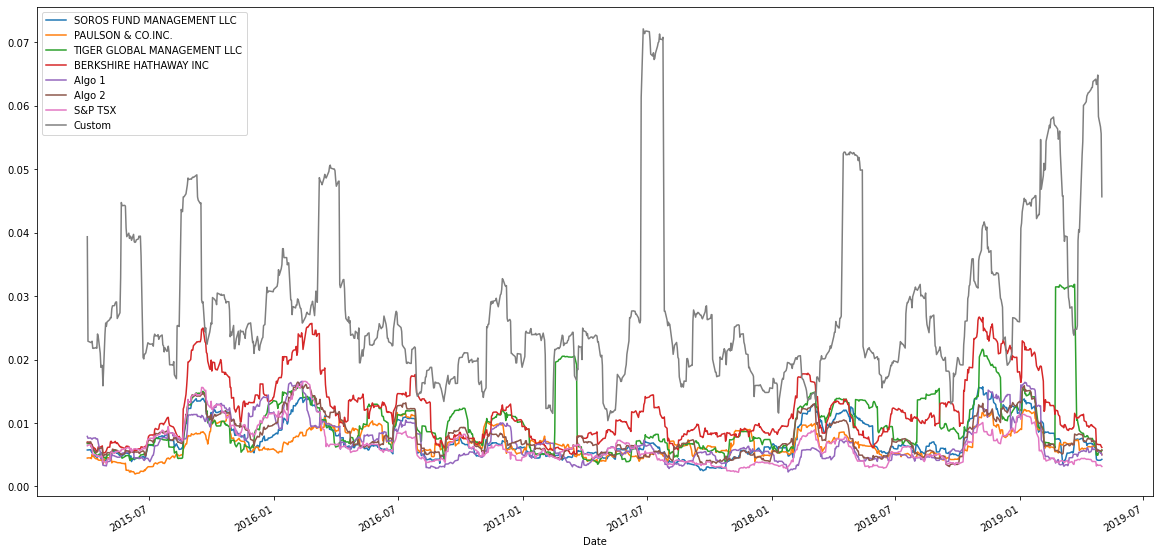

In [59]:
# Plot rolling standard deviation
join_custom_combined_df.rolling(window=21).std().plot(figsize =(20,10) )

### Calculate and plot the correlation

In [60]:
# Calculate and plot the correlation
custom_corr_returns = join_custom_combined_df.corr()
custom_corr_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.697124,0.560967,0.750205,0.313758,0.826663,0.674219,0.350462
PAULSON & CO.INC.,0.697124,1.000000,0.433108,0.539873,0.266208,0.674081,0.486166,0.325371
TIGER GLOBAL MANAGEMENT LLC,0.560967,0.433108,1.000000,0.423566,0.161234,0.506689,0.440862,0.180715
BERKSHIRE HATHAWAY INC,0.750205,0.539873,0.423566,1.000000,0.289252,0.684640,0.557091,0.350784
Algo 1,0.313758,0.266208,0.161234,0.289252,1.000000,0.285427,0.310104,0.195232
Algo 2,0.826663,0.674081,0.506689,0.684640,0.285427,1.000000,0.737750,0.406729
S&P TSX,0.674219,0.486166,0.440862,0.557091,0.310104,0.737750,1.000000,0.272487
Custom,0.350462,0.325371,0.180715,0.350784,0.195232,0.406729,0.272487,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

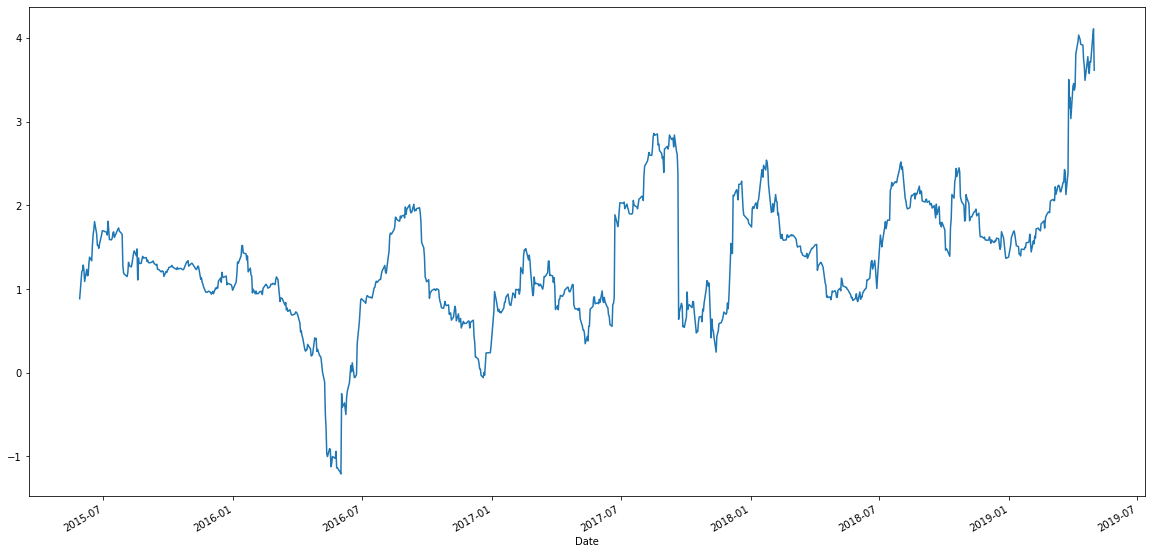

In [61]:
# Calculate and plot Beta
custom_sptsx = join_custom_combined_df['Custom'].rolling(window=60).cov(join_custom_combined_df['S&P TSX'])
custom_sptsx_variance = join_custom_combined_df['S&P TSX'].rolling(window=60).var()
custom_beta = custom_sptsx / custom_sptsx_variance
custom_beta.plot(figsize = (20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [62]:
# Calculate Annualized Sharpe Ratios
custom_annual_sharpe_ratios = (join_custom_combined_df.mean() * 252) / (join_custom_combined_df.std() * np.sqrt(252))
custom_annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.289348
PAULSON & CO.INC.             -0.536971
TIGER GLOBAL MANAGEMENT LLC   -0.143823
BERKSHIRE HATHAWAY INC         0.475245
Algo 1                         1.496278
Algo 2                         0.398774
S&P TSX                        0.214519
Custom                        -0.038558
dtype: float64

<AxesSubplot:>

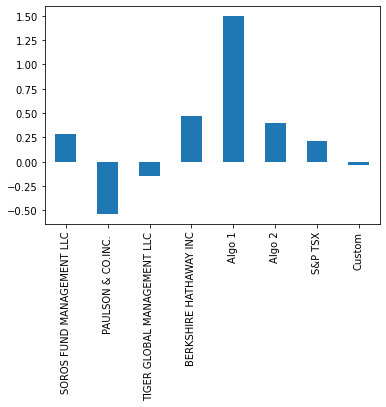

In [63]:
# Visualize the sharpe ratios as a bar plot
custom_annual_sharpe_ratios.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!


My custom portfolio did not perform well at all. not compared to whale, algo 1 & 2, and S&PTSX. The volatile value in custom stock is far to high indicating low confidence in stock. Standard deviation is also to high compared to the other portfolios meaning too many data are far from mean, non consistent data.